# The `analosis` package

**Author**: Natalie B. Hogg

The `analosis` (`analysis` + `los`) package allows us to perform various analyses of the line-of-sight effects using `lenstronomy` while maintaining the same settings across the board. 

**Warning**: in reality this means many parameter choices are hard-coded inside `analosis`. 

This notebook provides the interface with the `analosis` package, allowing you to choose what type of lensing scenario to analyse and to save the results to your machine.

In [1]:
# set the path to analosis relative to this notebook
import sys
sys.path.append('../..')

# import the Run class which allows you to run the analysis of your choice
from analosis.run import Run

### Cosmology
Choose the cosmological parameters which will be used by `lenstronomy`, `astropy` and `colossus` (for halo mass functions). The `id` must match one of those known to `colossus`: https://bdiemer.bitbucket.io/colossus/cosmology_cosmology.html#standard-cosmologies.

### Scenario
Choose the scenario you want to analyse.

Options:
* `composite lens`
* `distributed haloes`

### Complexity
Set the model complexity: you can choose to fit the generated image with a perfect model, a perfect minimal model, or a variety of incomplete minimal models. **This choice is only relevant for the composite lens**. It will be ignored if you run the distributed haloes scenario.

Options:
* `perfect`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS`
* `perfect minimal`: fits the generated image with a model consisting of `main lens` + `halo`+ `LOS MINIMAL`
* `missing halo`: fits the generated image with a model consisting of `main lens` +  `LOS MINIMAL`
* `missing offset`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS MINIMAL`, with the halo centre fixed to zero
* `missing ellipticity`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS MINIMAL`, with the halo ellipticity fixed to zero

### Number of runs
Choose the number of runs you want to do i.e. how many images will be created and fit.

### Parameters
Other parameters.

In [4]:
cosmology = {'id': 'planck18', 'H0': 67.4, 'Om': 0.315}

settings = {'scenario': 'composite lens',
            'complexity': 'minimal spherical halo',
            'lens_light': False,
            'number_of_images': 5,
            'MCMC': True,
            'job_name': 'test',
            'n_burn': 1000,
            'n_run': 1000}

parameters = {'maximum_shear': 0.03,
              'Einstein_radius_min': 0.6, # arcsec
              'maximum_source_offset_factor': 1,
              'sigma_halo_offset': 300} # pc

### Run
Finally, run the analysis. Note that you don't need to specify a path where you want your results to be saved: `analosis` automatically saves everything to a dedicated results directory. **Please don't push the contents of this directory to github!** (There is a .gitignore in place to prevent this, so you shouldn't have to worry about doing it accidentally).

In [5]:
result = Run(cosmology, settings, parameters)

Running the composite lens case with the following settings:

Model: minimal spherical halo
Number of runs: 5
Lens light: False
Starting MCMC


100%|██████████| 2000/2000 [06:33<00:00,  5.08it/s]


Computing the MCMC...
Number of walkers =  200
Burn-in iterations:  1000
Sampling iterations (in current run): 2000
393.8126699924469 time taken for MCMC sampling
the number of walkers in this chain is 200
Starting MCMC


100%|██████████| 2000/2000 [06:39<00:00,  5.01it/s]


Computing the MCMC...
Number of walkers =  200
Burn-in iterations:  1000
Sampling iterations (in current run): 2000
399.44378209114075 time taken for MCMC sampling
the number of walkers in this chain is 200
Starting MCMC


100%|██████████| 2000/2000 [06:50<00:00,  4.87it/s]


Computing the MCMC...
Number of walkers =  200
Burn-in iterations:  1000
Sampling iterations (in current run): 2000
410.8372721672058 time taken for MCMC sampling
the number of walkers in this chain is 200
Starting MCMC


100%|██████████| 2000/2000 [06:55<00:00,  4.82it/s]


Computing the MCMC...
Number of walkers =  200
Burn-in iterations:  1000
Sampling iterations (in current run): 2000
415.3443908691406 time taken for MCMC sampling
the number of walkers in this chain is 200
Starting MCMC


100%|██████████| 2000/2000 [07:20<00:00,  4.54it/s]

Computing the MCMC...
Number of walkers =  200
Burn-in iterations:  1000
Sampling iterations (in current run): 2000
441.2263398170471 time taken for MCMC sampling
the number of walkers in this chain is 200

Analysis complete and results saved at /Users/pierrefleury/GitHub/analosis/analosis/results.


In [6]:
from analosis.analysis.plots import Plots
p = Plots()
#path = result.pathfinder()
path = '/Users/pierrefleury/GitHub/analosis/analosis/results'

### Image plot

Preparing image plot...


../../analosis/analysis/plots.py:68: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(image_list[n]), origin='lower', vmin=v_min, vmax=v_max, cmap=cmap, extent=[0, 1, 0, 1])


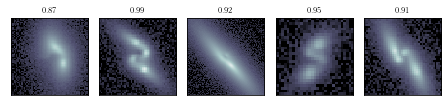

In [7]:
p.image_plot(path, settings, number_of_columns=10)

### Input vs output plot

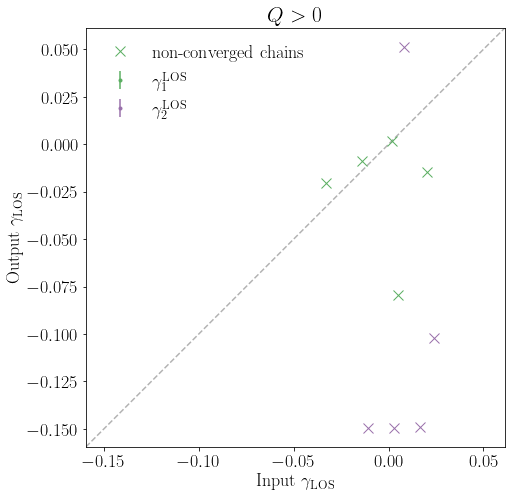

In [8]:
p.input_output_plot(path, settings, show_not_converged=True)

### Examine input kwargs

In [9]:
import pandas as pd
kwargs = pd.read_csv(path + '/datasets//input_kwargs.csv')
kwargs

,R_sersic_bar,n_sersic_bar,k_eff_bar,e1_bar,e2_bar,x_bar,y_bar,Rs,alpha_Rs,x_nfw,...,y_ll,amp_ll,amp_sl,R_sersic_sl,n_sersic_sl,x_sl,y_sl,e1_sl,e2_sl,estimated theta_E [arcsec]
0,0.324797,4.517802,0.092870,0.579344,0.132335,0,0,4.923680,0.813083,0.039988,...,0,2758.522891,120.077535,0.325505,4.276512,0.361080,0.123674,-0.279378,0.033881,0.815420
1,0.572638,4.204427,0.062239,0.086340,0.149695,0,0,7.979347,1.213257,-0.030418,...,0,6305.826305,131.161565,0.151424,3.967885,0.039835,-0.033116,0.108995,-0.588947,1.141641
2,0.230259,3.615645,0.137584,0.034993,-0.131433,0,0,5.278967,0.602634,0.036546,...,0,2118.798473,259.947337,0.514328,3.430963,0.132251,-0.423117,-0.109032,-0.631179,0.602977
3,0.268942,3.695838,0.137616,0.162288,-0.238143,0,0,4.092257,0.530848,0.001729,...,0,2779.573575,113.753946,0.097729,2.805582,-0.020922,-0.062010,0.133238,0.238855,0.701254
4,0.429822,5.050928,0.070487,-0.244972,0.078212,0,0,6.566983,0.813610,0.003666,...,0,4786.729235,295.252275,0.165856,3.894319,0.069925,-0.134807,-0.356273,-0.311576,0.881644
